# Random Forest Tutorial

*This notebook servers as an introduction to Random Forest which is a tree based ensemble learning algorithms. In this notebook I will cover the technical details behind random forest and it's suitability as a (supervised) anomaly detection tool. I present a small working example of using random forest for xyz forecasting and anomaly detection in a test dataset.*

*Since decision trees lie at the core of random forest it stands to reason to have a quick overview of decision trees and the methods of ensembling the.*

## Decision Trees


In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [47]:
df = pd.read_csv('resources/Random_Forest/temps.csv')
df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [48]:
yrs = df['year']
mnths = df['month']
days = df['day']

dates = [str(int(day))+'-'+str(int(mnth))+'-'+str(int(yr)) for day, mnth, yr in zip(days,mnths, yrs)]
dates = [datetime.datetime.strptime(date, '%d-%m-%Y') for date in dates]

(348, 15)

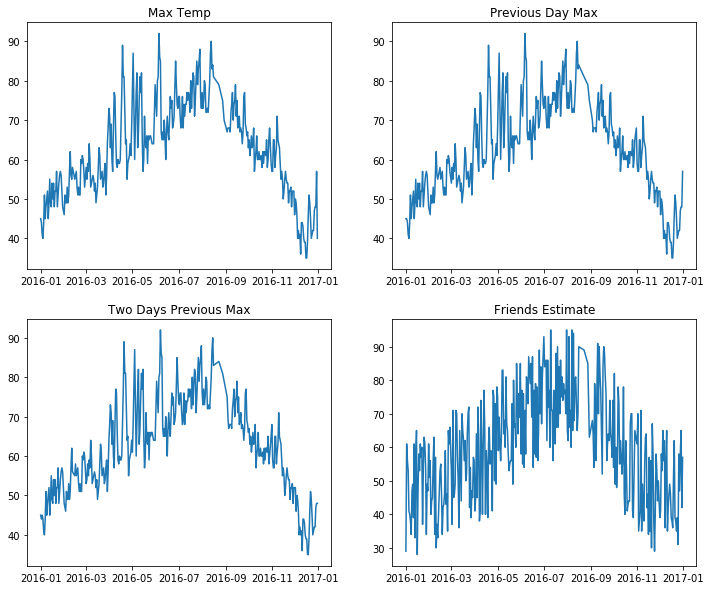

In [49]:
fig = plt.figure(figsize=(12,10))
plt.tight_layout()
plot_cols = ['actual', 'temp_1', 'temp_2', 'friend']
titles = ['Max Temp', 'Previous Day Max', 'Two Days Previous Max', 'Friends Estimate']
z=1
for i, pc in enumerate(plot_cols):
    plt.subplot(2,2,z)
    plt.plot(dates, df[pc])
    plt.title(titles[i])
    z+=1
df = pd.get_dummies(df)
df.shape


In [51]:
Y_data = df['actual'].values
df2 = df.drop('actual', axis=1)
X_data = df2.values
all_features = list(df2.columns)

X_train, X_test, Train_labels, Test_labels = train_test_split(X_data, Y_data, test_size=0.20, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Train_labels.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Test_labels.shape)


Training Features Shape: (278, 14)
Training Labels Shape: (278,)
Testing Features Shape: (70, 14)
Testing Labels Shape: (70,)


In [53]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_reg.fit(X_train, Train_labels)
print("Training Complete")

Training Complete


In [58]:
pred = rf_reg.predict(X_test)
error = mean_absolute_error(Test_labels, pred)
print('Mean Absolute Error:', error, 'degrees.')

all_errors =  abs(pred - Test_labels)
mape = 100 * (all_errors / Test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')




Mean Absolute Error: 3.745457142857142 degrees.
Accuracy: 94.07 %.
